### Extra
Code for generating confusion matrices for different trained models as well as doing kfold cross validation training and saving the kfolds.

In [ ]:
# plotting accuracy over the epochs for a trained model
import numpy as np
import matplotlib.pyplot as plt

values = []
colors = ['r', 'g', 'y', 'k', 'b']
histories = np.load('models/vgg16_kfolds.npy', allow_pickle=True)
for i in range(1, 6):
    jc = histories[i-1]
    epoches = jc['epoch']
    epoches = epoches + [len(epoches)]
    train_acc = [0] + jc['history']['accuracy']
    val_acc = [0] + jc['history']['val_accuracy']

    plt.plot(epoches, train_acc, '--', color=colors[i-1])
    plt.plot(epoches, val_acc, color=colors[i-1])
    plt.xlabel('epochs', fontsize=15)
    plt.ylabel('accuracy', fontsize=15)
    values.append('fold{}'.format(i))
# plt.legend(['train', 'val'], fontsize=12)
plt.title('TL VGG16 5 Fold CV', fontsize=15)
# plt.ylim([0.90, .95])
plt.savefig('figures/tl_vgg16_5foldCV.png', dpi=300)
plt.show()

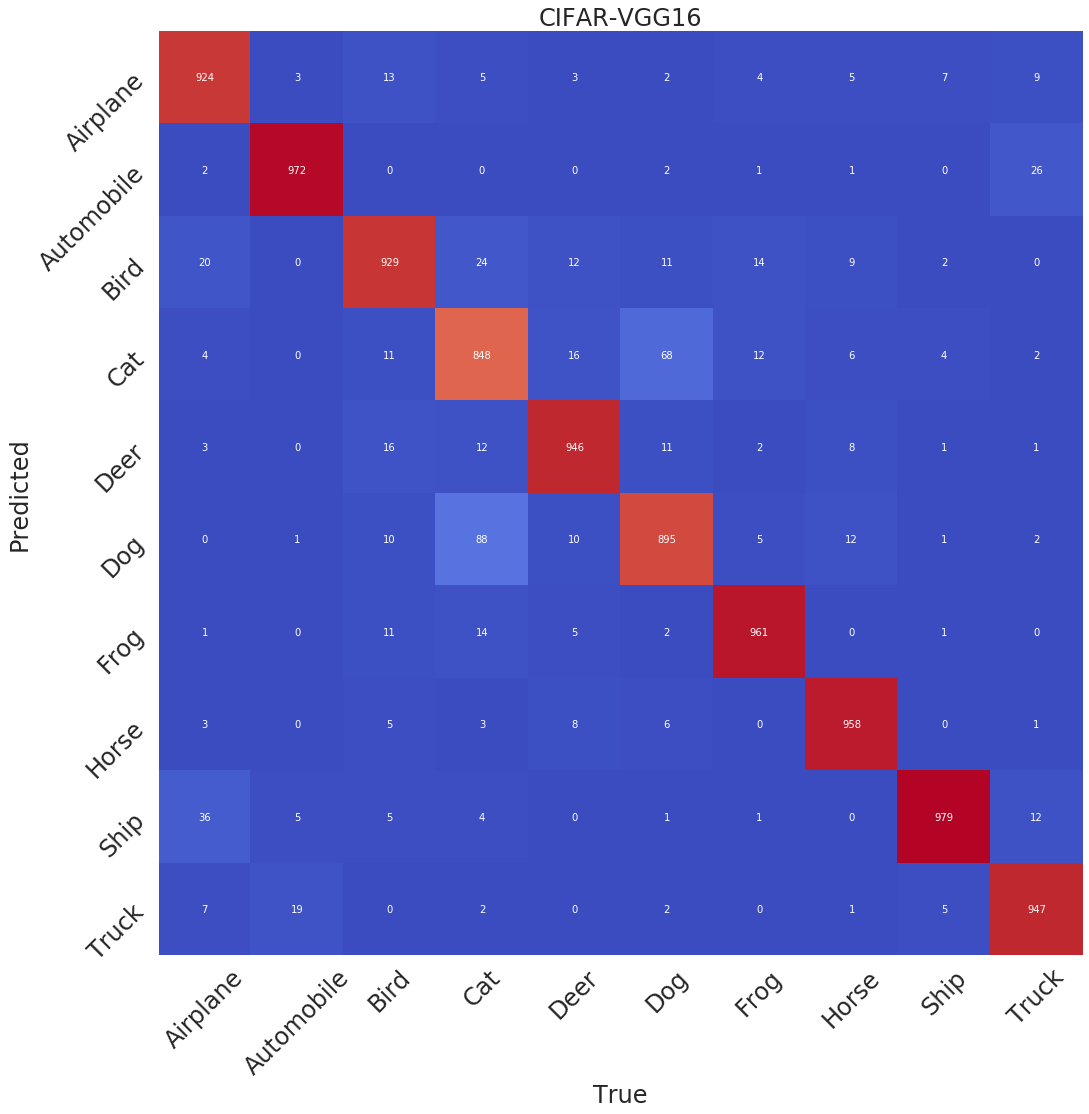

In [2]:
%matplotlib inline
from modules import utils, vgg16, fcnn, cifar_vgg
    
# model = vgg16(train=False)
# model = fcnn(train=False, model_path='models/allFeatures_pca1000.h5', 
#              features_path='data/allFeatures_pca1000_features.npy')
model = cifar_vgg(train=False)
utils.plot_confusion_matrix(model, title='CIFAR-VGG16', save_path='figures/cifar_vgg_cm.png')
# utils.plot_confusion_matrix(model, title='All Features 1000 PCA', save_path='figures/allPCA1000_cm.png')

### Sample three correct and wrong classifications


In [ ]:
# load model of interest and predict on testing dataset
from modules import fcnn

model = fcnn(train=False, model_path='models/allFeatures_pca1000.h5', 
             features_path='data/allFeatures_pca1000_features.npy')
preds = model.predict()

In [ ]:
# sample three classes that were correct and three that were not
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import numpy as np
import random
from tensorflow.keras.datasets import cifar10
random.seed(334)

pred_y = []
for i in range(preds.shape[0]):
    pred_y.append(np.argmax(preds[i]))
    
true_y = [int(i) for i in list(model.y_test)]

correct_i = []
incorrect_i = []

for i in range(len(pred_y)):
    if pred_y[i] == true_y[i]:
        correct_i.append(i)
    else:
        incorrect_i.append(i)

# shuffle the lists
random.shuffle(correct_i)
random.shuffle(incorrect_i)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
LABELS = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# for the first three show the image and on the bottom label put the percentages
fig, ax = plt.subplots(nrows=3, figsize=(10, 8))
for j, i in enumerate(correct_i[:3]):
    ax[j].imshow(x_test[i], interpolation='bicubic')
    ax[j].axes.get_yaxis().set_visible(False)
    ax[j].tick_params(axis=u'both', which=u'both',length=0)
    ax[j].set_xticklabels([])
    probs = [float(p) for p in preds[i]]
    labels = LABELS.copy()
    
    # sort the two lists
    probs, labels = (list(t) for t in zip(*sorted(zip(probs, labels))))
    ax[j].set_xlabel('%s: %.2f  | %s: %.2E |  %s: %.2E' % (
        labels[-1], probs[-1], labels[-2], probs[-2], labels[-3], probs[-3]
    ))
plt.savefig('figures/correct_samples.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=3, figsize=(10, 8))
for j, i in enumerate(incorrect_i[:3]):
    ax[j].imshow(x_test[i], interpolation='bicubic')
    ax[j].axes.get_yaxis().set_visible(False)
    ax[j].tick_params(axis=u'both', which=u'both',length=0)
    ax[j].set_xticklabels([])
    probs = [float(p) for p in preds[i]]
    labels = LABELS.copy()
    
    # sort the two lists
    probs, labels = (list(t) for t in zip(*sorted(zip(probs, labels))))
    ax[j].set_xlabel('%s: %.3f  | %s: %.3f |  %s: %.2E' % (
        labels[-1], probs[-1], labels[-2], probs[-2], labels[-3], probs[-3]
    ))
plt.savefig('figures/incorrect_samples.png', dpi=300)
plt.show()

### Kfold cross validation training

In [ ]:
from modules import utils, vgg16, fcnn, cifar_vgg
    
model = vgg16(train=False)
model.train_kfold()

#### Print out early stopper epochs for each run we have history

In [ ]:
import numpy as np


files = ['models/allFeatures_pca1000.npy', 'models/tfFeatures.npy', 'models/vgg16_second.npy',
        'models/resnet2_second.npy', 'models/']

for f in files:
    history = np.load(f, allow_pickle=True).item()
    n = len(history['epoch'])
    print(n)